# CUSTOMER TRANSACTION PREDICTION

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Reading the dataset
data = pd.read_csv("C:\\Users\\aishu\\OneDrive\\Documents\\train(1).csv")

In [3]:
data #Original Dataset

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,train_199995,0,11.4880,-0.4956,8.2622,3.5142,10.3404,11.6081,5.6709,15.1516,...,6.1415,13.2305,3.9901,0.9388,18.0249,-1.7939,2.1661,8.5326,16.6660,-17.8661
199996,train_199996,0,4.9149,-2.4484,16.7052,6.6345,8.3096,-10.5628,5.8802,21.5940,...,4.9611,4.6549,0.6998,1.8341,22.2717,1.7337,-2.1651,6.7419,15.9054,0.3388
199997,train_199997,0,11.2232,-5.0518,10.5127,5.6456,9.3410,-5.4086,4.5555,21.5571,...,4.0651,5.4414,3.1032,4.8793,23.5311,-1.5736,1.2832,8.7155,13.8329,4.1995
199998,train_199998,0,9.7148,-8.6098,13.6104,5.7930,12.5173,0.5339,6.0479,17.0152,...,2.6840,8.6587,2.7337,11.1178,20.4158,-0.0786,6.7980,10.0342,15.5289,-13.9001


In [4]:
#Check the shape pf dataset
data.shape

(200000, 202)

<Axes: xlabel='target', ylabel='count'>

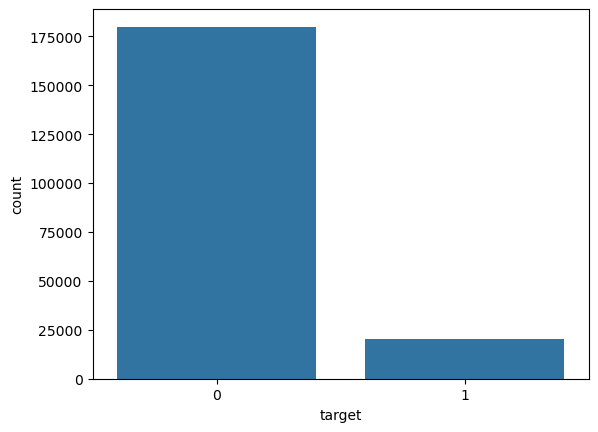

In [5]:
#Check the count of majority and minority class
sns.countplot(x=data['target'])

In [6]:

data['target'].value_counts()

target
0    179902
1     20098
Name: count, dtype: int64

In [7]:
#Check for null values 
data.isnull().sum()

ID_code    0
target     0
var_0      0
var_1      0
var_2      0
          ..
var_195    0
var_196    0
var_197    0
var_198    0
var_199    0
Length: 202, dtype: int64

In [8]:
#Check for the description of each variable
data.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


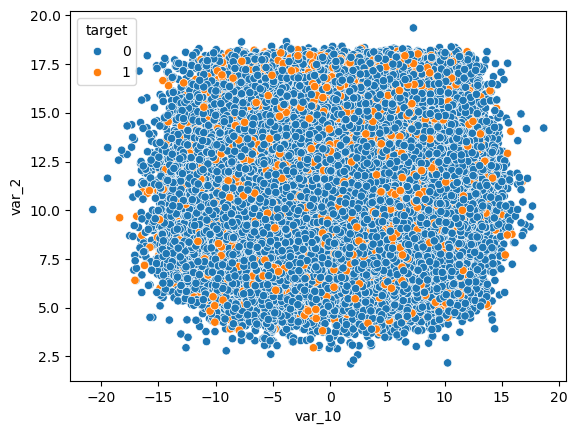

In [9]:
sns.scatterplot(data=data, x='var_10', y='var_2', hue='target')
plt.show()


<Axes: ylabel='var_198'>

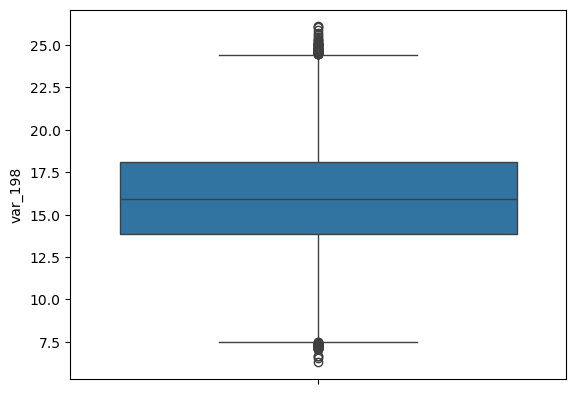

In [10]:
#Check for outliers
sns.boxplot(data.var_198)

In [11]:
numeric_data = data.select_dtypes(include=['int64', 'float64'])
corr = numeric_data.corr()

In [12]:
corr

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
target,1.000000,0.052390,0.050343,0.055870,0.011055,0.010915,0.030979,0.066731,-0.003025,0.019584,...,0.055973,0.047114,-0.042858,-0.017709,-0.022838,0.028285,0.023608,-0.035303,-0.053000,0.025434
var_0,0.052390,1.000000,-0.000544,0.006573,0.003801,0.001326,0.003046,0.006983,0.002429,0.004962,...,0.002752,0.000206,-0.005373,0.001616,-0.001514,0.002073,0.004386,-0.000753,-0.005776,0.003850
var_1,0.050343,-0.000544,1.000000,0.003980,0.000010,0.000303,-0.000902,0.003258,0.001511,0.004098,...,0.006627,0.003621,-0.002604,0.001153,-0.002557,-0.000785,-0.000377,-0.004157,-0.004861,0.002287
var_2,0.055870,0.006573,0.003980,1.000000,0.001001,0.000723,0.001569,0.000883,-0.000991,0.002648,...,0.000197,0.001285,-0.003400,0.000549,0.002104,-0.001070,0.003952,0.001078,-0.000877,0.003855
var_3,0.011055,0.003801,0.000010,0.001001,1.000000,-0.000322,0.003253,-0.000774,0.002500,0.003553,...,0.000151,0.002445,-0.001530,-0.001699,-0.001054,0.001206,-0.002800,0.001164,-0.001651,0.000506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
var_195,0.028285,0.002073,-0.000785,-0.001070,0.001206,0.003706,-0.001274,0.001244,0.001854,0.001396,...,0.004571,0.000870,-0.004745,-0.003143,-0.001201,1.000000,0.002517,-0.004170,-0.000536,0.002042
var_196,0.023608,0.004386,-0.000377,0.003952,-0.002800,0.000513,0.002880,0.005378,0.001045,-0.003242,...,-0.000847,0.002466,-0.001386,-0.005308,-0.005040,0.002517,1.000000,-0.000454,0.000253,0.000607
var_197,-0.035303,-0.000753,-0.004157,0.001078,0.001164,-0.000046,-0.000535,-0.003565,0.003466,-0.004583,...,-0.004974,0.000906,-0.000527,0.005068,0.000884,-0.004170,-0.000454,1.000000,0.001183,0.004991
var_198,-0.053000,-0.005776,-0.004861,-0.000877,-0.001651,-0.001821,-0.000953,-0.003025,0.000650,0.002950,...,-0.000153,-0.000067,0.003451,0.001646,0.003194,-0.000536,0.000253,0.001183,1.000000,-0.004731


<Axes: >

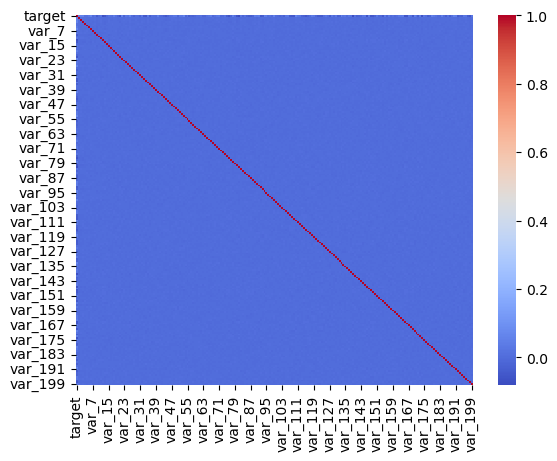

In [13]:
sns.heatmap(corr,cmap = 'coolwarm')

In [14]:
col = data.columns.values[2:102]
col


array(['var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6',
       'var_7', 'var_8', 'var_9', 'var_10', 'var_11', 'var_12', 'var_13',
       'var_14', 'var_15', 'var_16', 'var_17', 'var_18', 'var_19',
       'var_20', 'var_21', 'var_22', 'var_23', 'var_24', 'var_25',
       'var_26', 'var_27', 'var_28', 'var_29', 'var_30', 'var_31',
       'var_32', 'var_33', 'var_34', 'var_35', 'var_36', 'var_37',
       'var_38', 'var_39', 'var_40', 'var_41', 'var_42', 'var_43',
       'var_44', 'var_45', 'var_46', 'var_47', 'var_48', 'var_49',
       'var_50', 'var_51', 'var_52', 'var_53', 'var_54', 'var_55',
       'var_56', 'var_57', 'var_58', 'var_59', 'var_60', 'var_61',
       'var_62', 'var_63', 'var_64', 'var_65', 'var_66', 'var_67',
       'var_68', 'var_69', 'var_70', 'var_71', 'var_72', 'var_73',
       'var_74', 'var_75', 'var_76', 'var_77', 'var_78', 'var_79',
       'var_80', 'var_81', 'var_82', 'var_83', 'var_84', 'var_85',
       'var_86', 'var_87', 'var_88', 'var_89', 'var_

In [15]:
def boxplot(data,col):
    sns.set(style = 'whitegrid')
    fig,ax = plt.subplots(10,10,figsize = (20,20))
    i = 0
    
    for column in col:
        i+=1
        plt.subplot(10,10,i)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=9)
        
        
    plt.show()

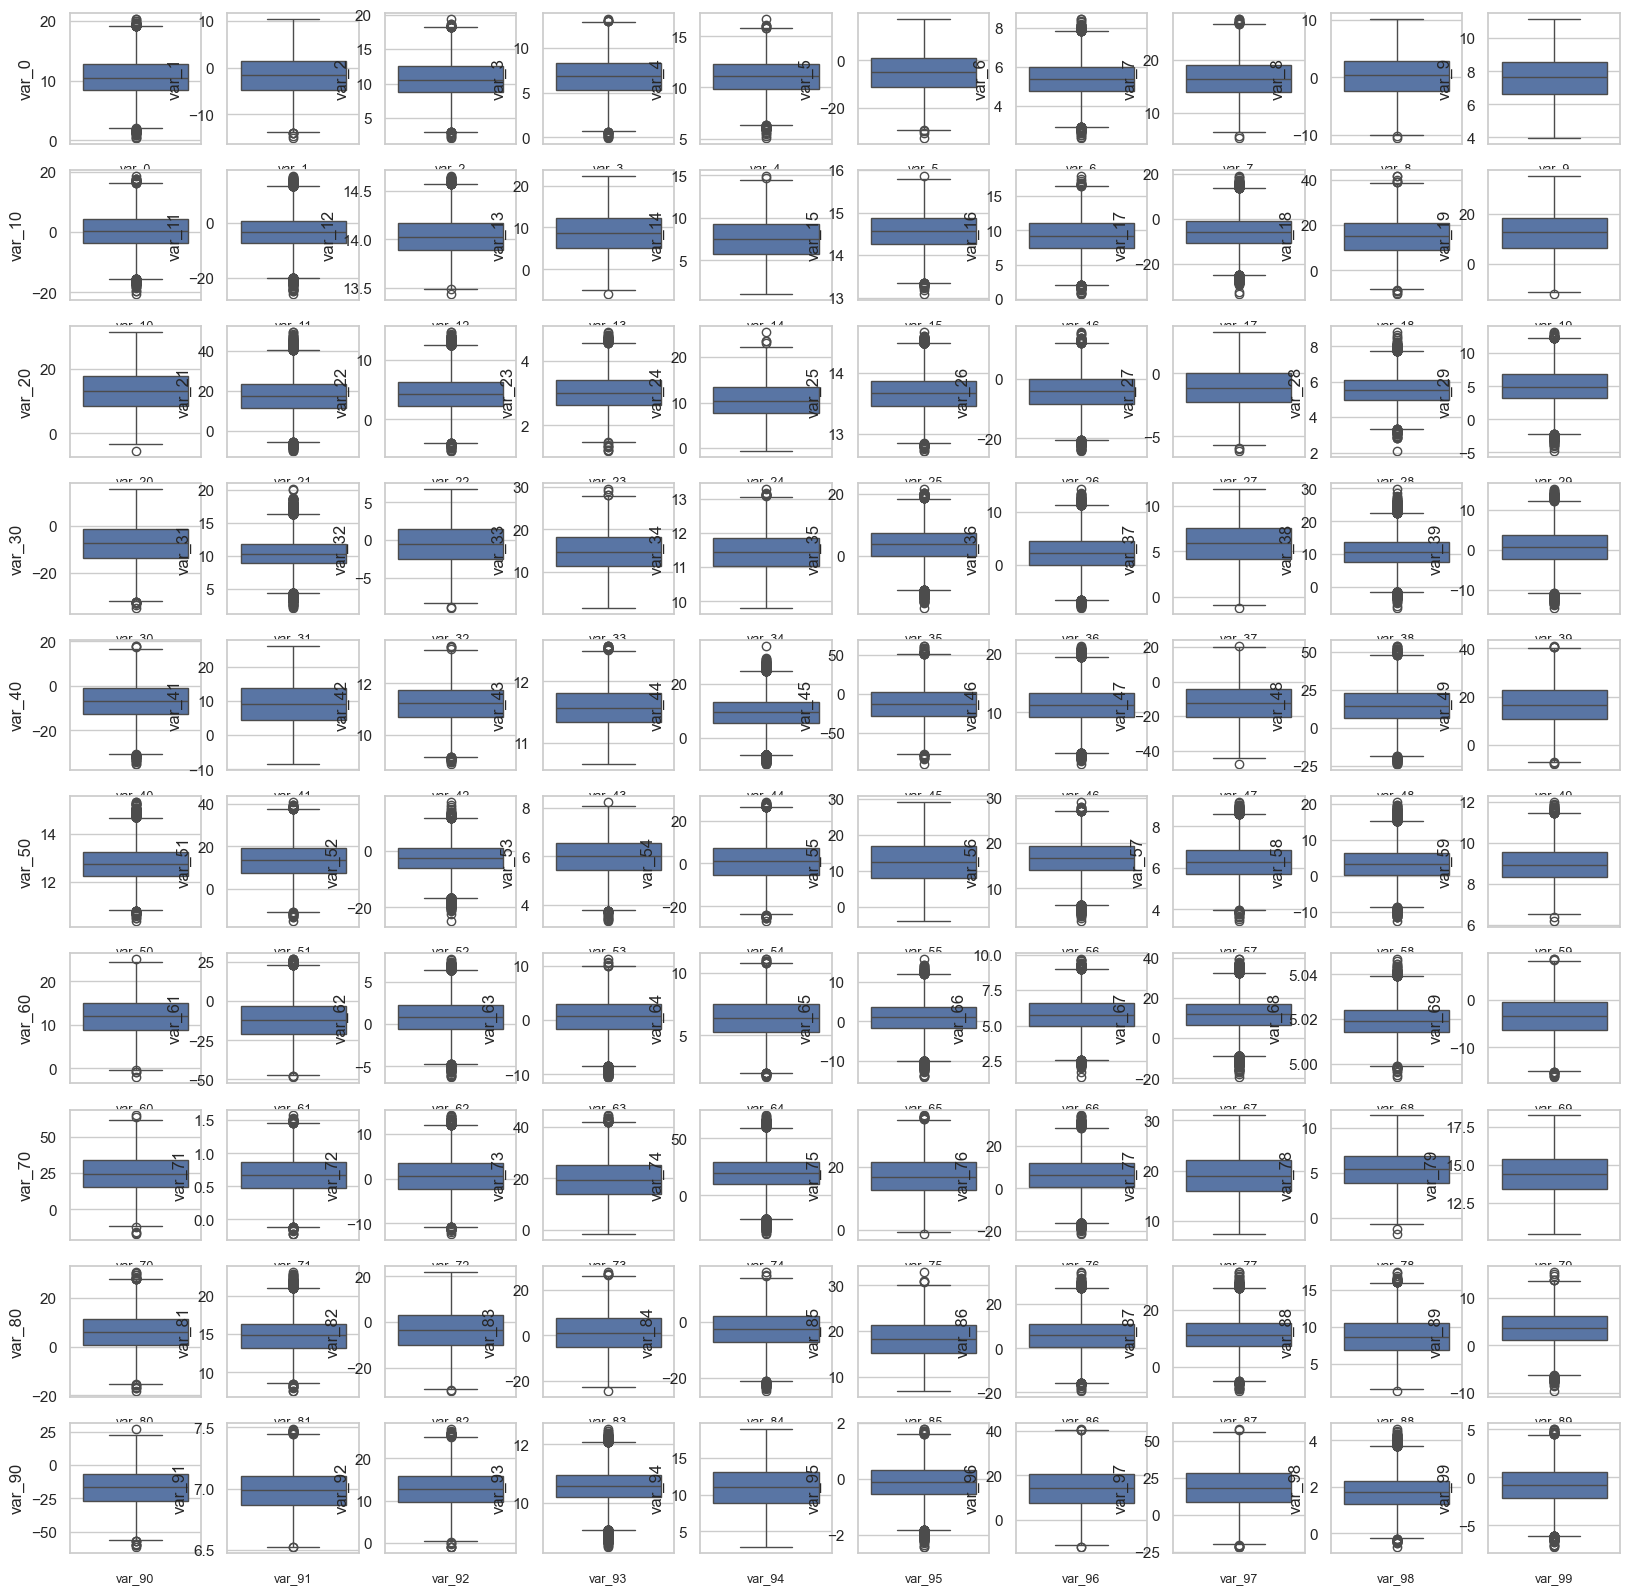

In [16]:
boxplot(data,col)

In [17]:
col2 = data.columns.values[102:-1]
col2

array(['var_100', 'var_101', 'var_102', 'var_103', 'var_104', 'var_105',
       'var_106', 'var_107', 'var_108', 'var_109', 'var_110', 'var_111',
       'var_112', 'var_113', 'var_114', 'var_115', 'var_116', 'var_117',
       'var_118', 'var_119', 'var_120', 'var_121', 'var_122', 'var_123',
       'var_124', 'var_125', 'var_126', 'var_127', 'var_128', 'var_129',
       'var_130', 'var_131', 'var_132', 'var_133', 'var_134', 'var_135',
       'var_136', 'var_137', 'var_138', 'var_139', 'var_140', 'var_141',
       'var_142', 'var_143', 'var_144', 'var_145', 'var_146', 'var_147',
       'var_148', 'var_149', 'var_150', 'var_151', 'var_152', 'var_153',
       'var_154', 'var_155', 'var_156', 'var_157', 'var_158', 'var_159',
       'var_160', 'var_161', 'var_162', 'var_163', 'var_164', 'var_165',
       'var_166', 'var_167', 'var_168', 'var_169', 'var_170', 'var_171',
       'var_172', 'var_173', 'var_174', 'var_175', 'var_176', 'var_177',
       'var_178', 'var_179', 'var_180', 'var_181', 

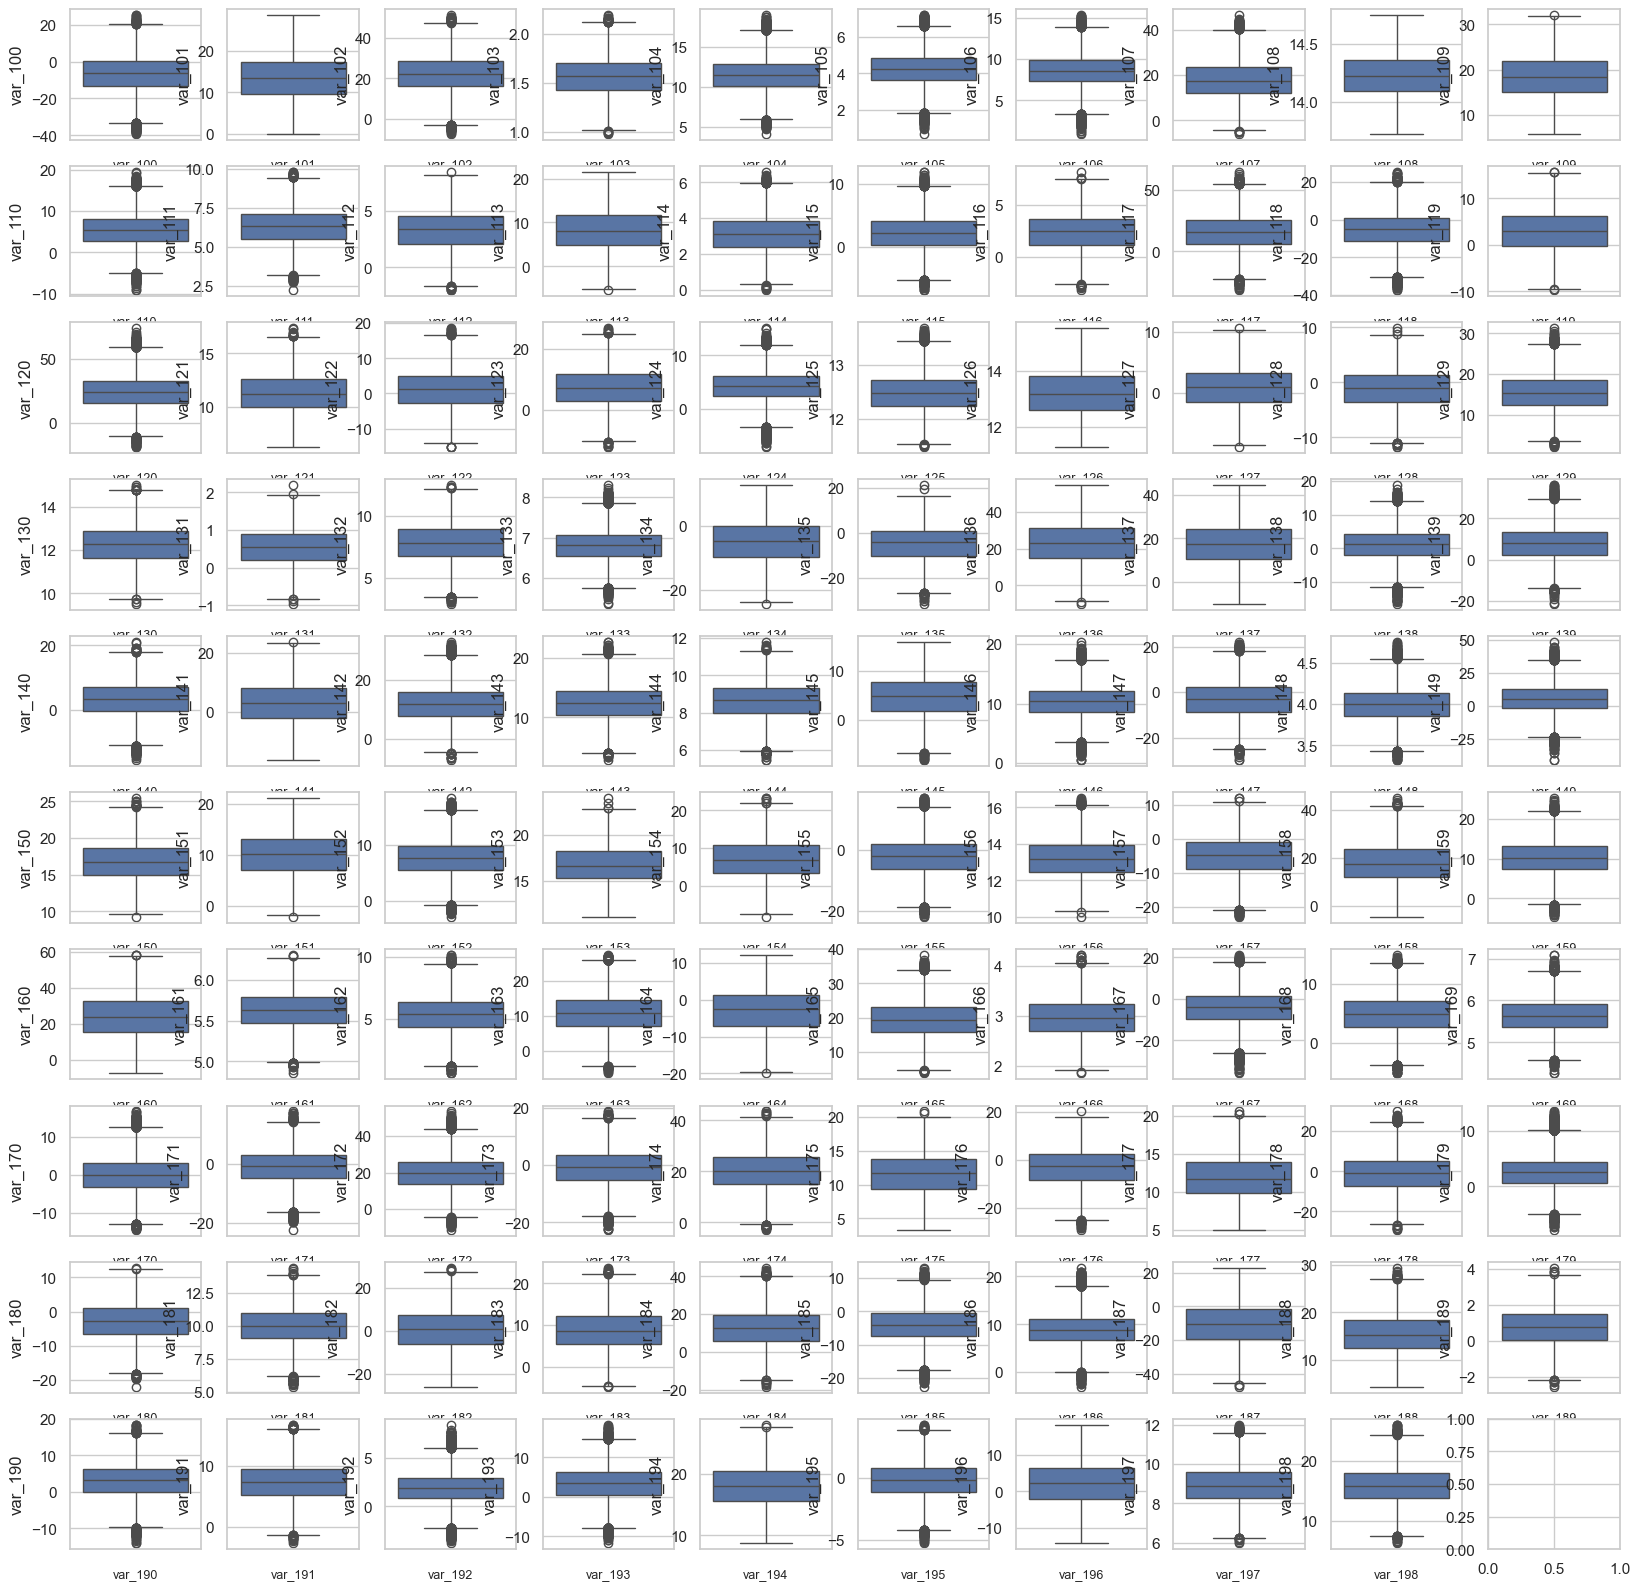

In [18]:
boxplot(data,col2)

In [19]:
def plot_dist(data,col):
    sns.set(style = 'whitegrid')
    fig,ax = plt.subplots(10,10,figsize = (20,20))
    i = 0
    
    for column in col:
        i+=1
        plt.subplot(10,10,i)
        plt.xlabel(column,fontsize=9)
        
        sns.histplot(data[column])
        plt.tight_layout()
    plt.show()

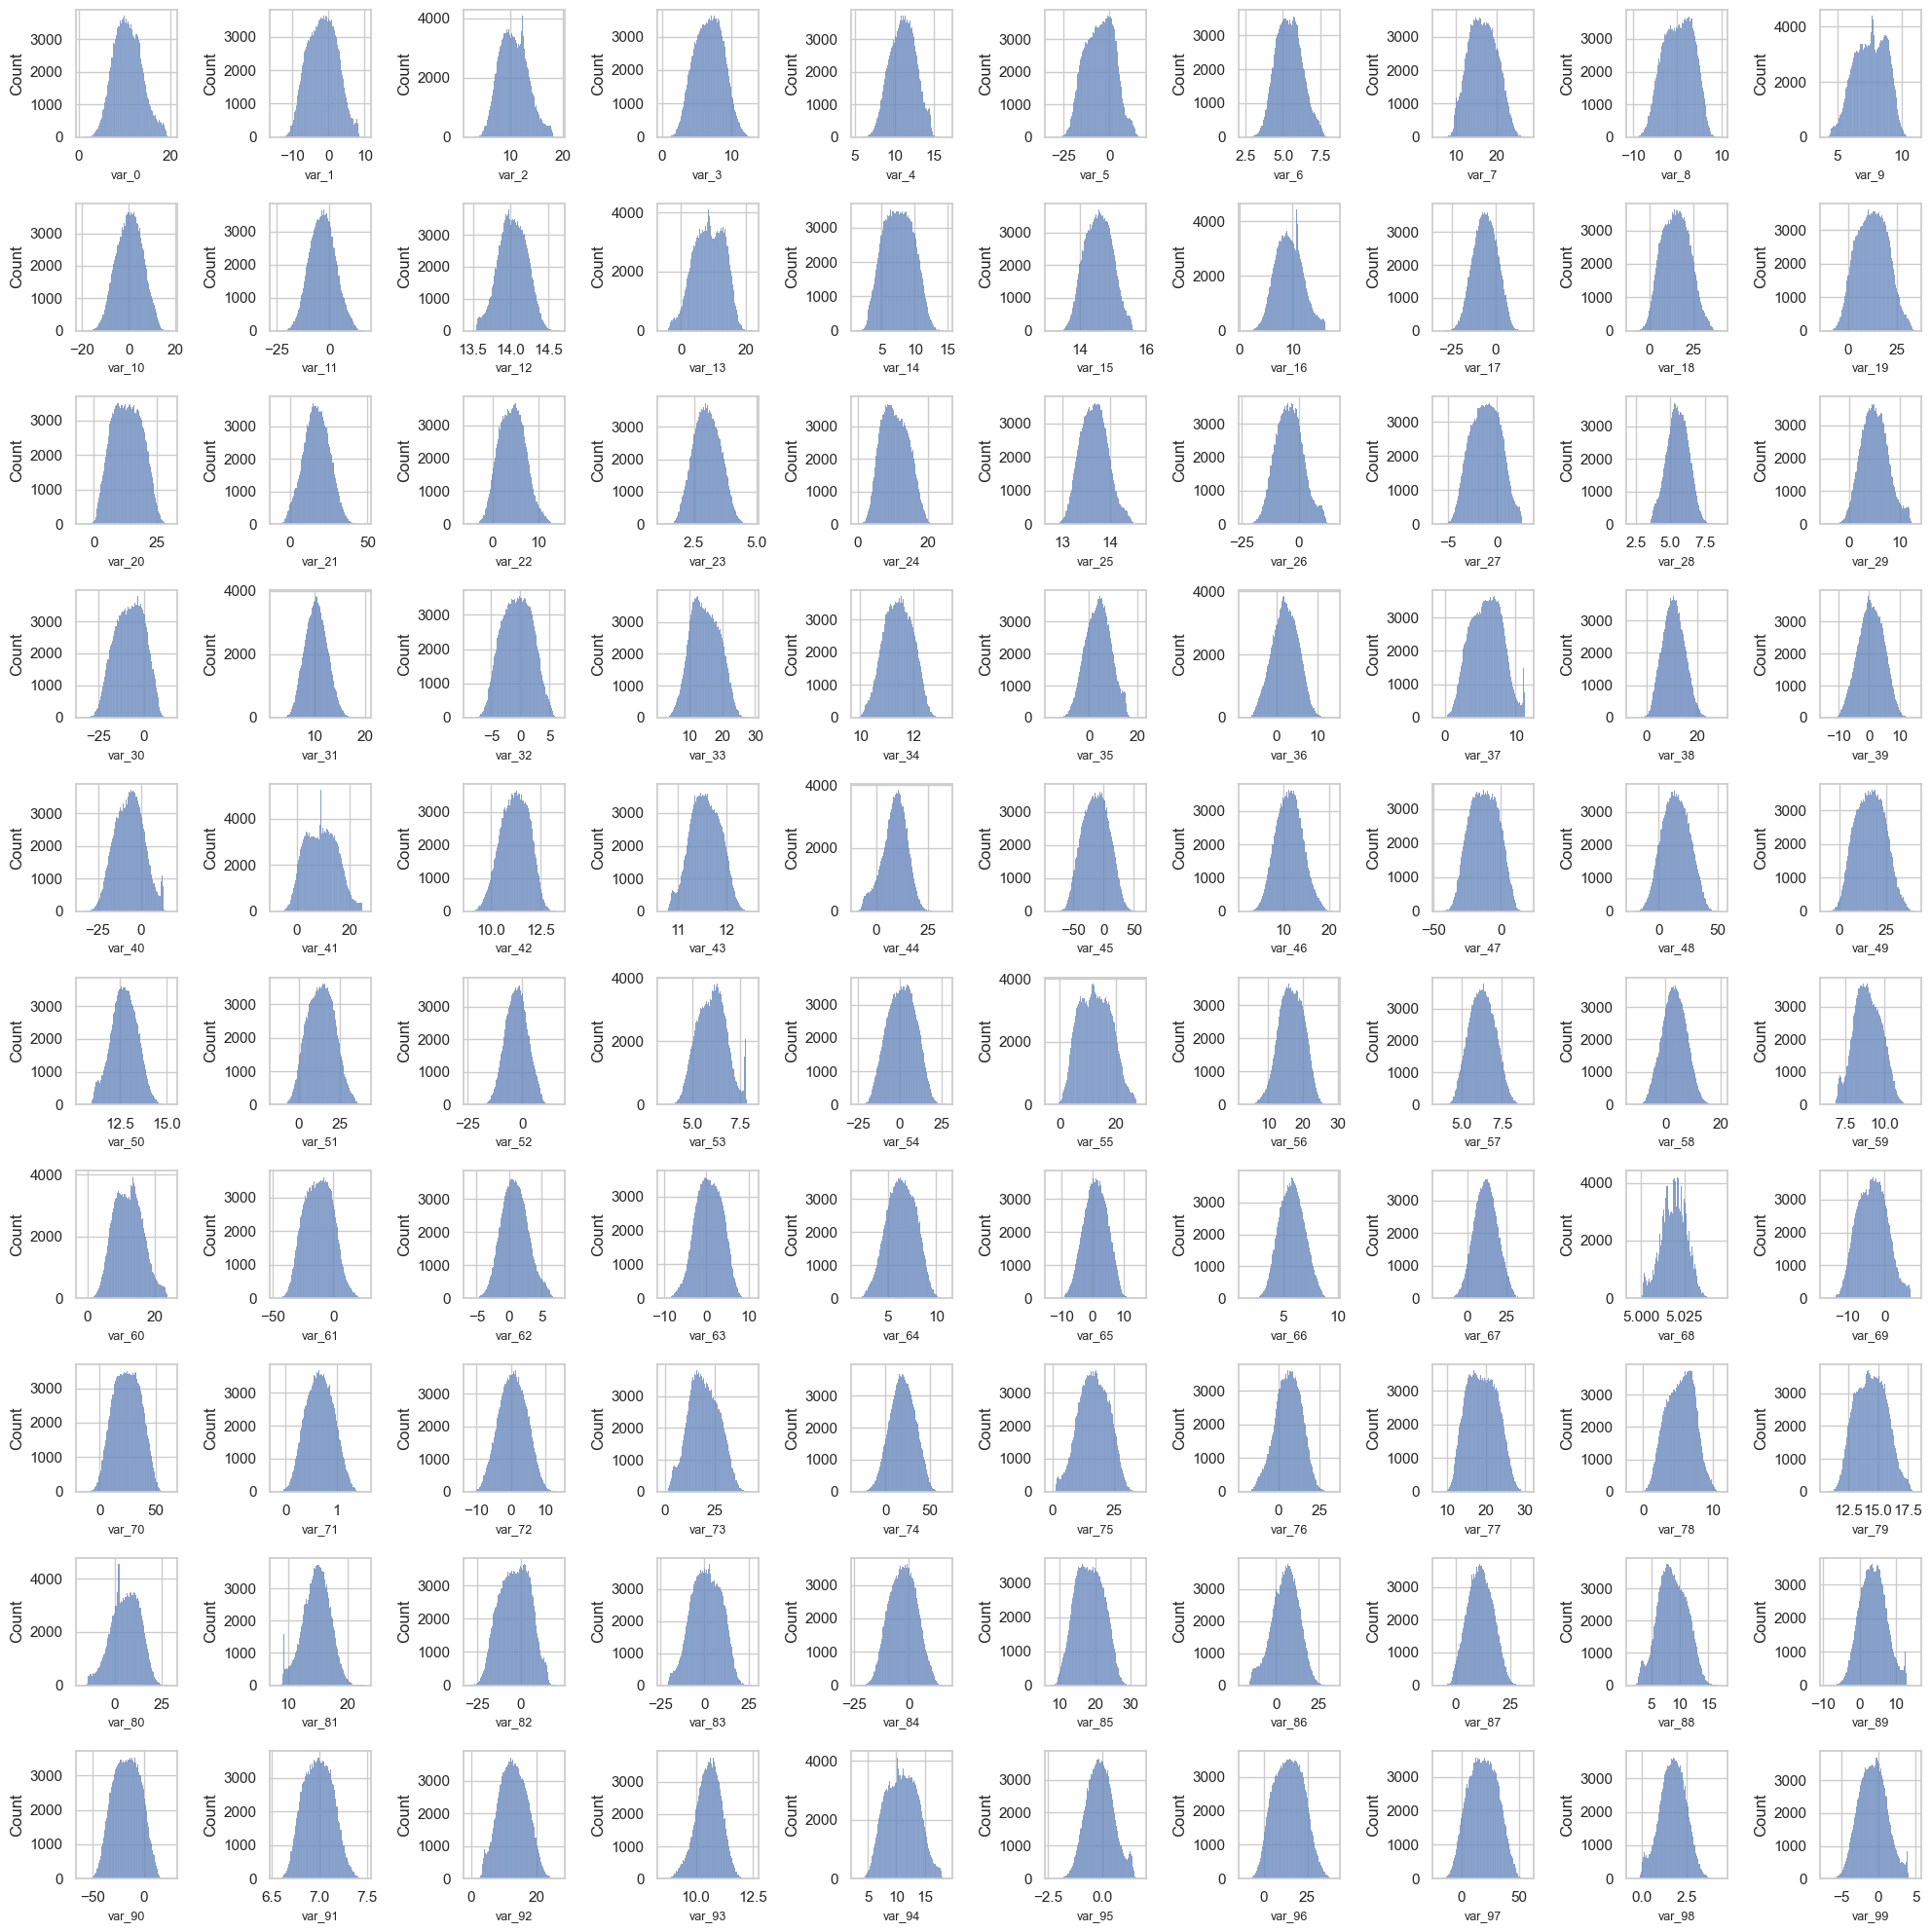

In [20]:
plot_dist(data,col)

## EDA OBSERVATIONS 

### 1) The dataset is highly imbalanced
### 2) Outliers are present in almost all variables
### 3) Almost all variables are normally distributed 

In [21]:
column_names = data.drop(['target','ID_code'],axis=1).columns.values
column_names

array(['var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6',
       'var_7', 'var_8', 'var_9', 'var_10', 'var_11', 'var_12', 'var_13',
       'var_14', 'var_15', 'var_16', 'var_17', 'var_18', 'var_19',
       'var_20', 'var_21', 'var_22', 'var_23', 'var_24', 'var_25',
       'var_26', 'var_27', 'var_28', 'var_29', 'var_30', 'var_31',
       'var_32', 'var_33', 'var_34', 'var_35', 'var_36', 'var_37',
       'var_38', 'var_39', 'var_40', 'var_41', 'var_42', 'var_43',
       'var_44', 'var_45', 'var_46', 'var_47', 'var_48', 'var_49',
       'var_50', 'var_51', 'var_52', 'var_53', 'var_54', 'var_55',
       'var_56', 'var_57', 'var_58', 'var_59', 'var_60', 'var_61',
       'var_62', 'var_63', 'var_64', 'var_65', 'var_66', 'var_67',
       'var_68', 'var_69', 'var_70', 'var_71', 'var_72', 'var_73',
       'var_74', 'var_75', 'var_76', 'var_77', 'var_78', 'var_79',
       'var_80', 'var_81', 'var_82', 'var_83', 'var_84', 'var_85',
       'var_86', 'var_87', 'var_88', 'var_89', 'var_

In [22]:
train_df = data.copy() ## will apply all functions in train_df
train_df

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,train_199995,0,11.4880,-0.4956,8.2622,3.5142,10.3404,11.6081,5.6709,15.1516,...,6.1415,13.2305,3.9901,0.9388,18.0249,-1.7939,2.1661,8.5326,16.6660,-17.8661
199996,train_199996,0,4.9149,-2.4484,16.7052,6.6345,8.3096,-10.5628,5.8802,21.5940,...,4.9611,4.6549,0.6998,1.8341,22.2717,1.7337,-2.1651,6.7419,15.9054,0.3388
199997,train_199997,0,11.2232,-5.0518,10.5127,5.6456,9.3410,-5.4086,4.5555,21.5571,...,4.0651,5.4414,3.1032,4.8793,23.5311,-1.5736,1.2832,8.7155,13.8329,4.1995
199998,train_199998,0,9.7148,-8.6098,13.6104,5.7930,12.5173,0.5339,6.0479,17.0152,...,2.6840,8.6587,2.7337,11.1178,20.4158,-0.0786,6.7980,10.0342,15.5289,-13.9001


# Outlier removal

In [23]:
for i in column_names:
    #print(i)
    #print(train_df.loc[:,i])
    q75,q25 = np.percentile(train_df.loc[:,i],[75,25])
    #print(q75 , q25)
    iqr = q75 - q25 
    min = q25 - (1.5*iqr)
    max = q75 + (1.5*iqr)
    #print(min , max)
    #print(train_df[train_df.loc[:,i]<min].index)
    train_df = train_df.drop(train_df[train_df.loc[:,i]<min].index)
    train_df = train_df.drop(train_df[train_df.loc[:,i]>max].index)
    


In [24]:
print("Total observations removed :",data.shape[0]-train_df.shape[0])
print(data.shape[0])
print(train_df.shape[0])

Total observations removed : 24927
200000
175073


In [25]:
train_df 
x2 = train_df.iloc[:,2:]
y2 = train_df.iloc[:,1]


# Sampling

In [26]:
train_df2 = data.copy()

In [27]:
train_df2

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,train_199995,0,11.4880,-0.4956,8.2622,3.5142,10.3404,11.6081,5.6709,15.1516,...,6.1415,13.2305,3.9901,0.9388,18.0249,-1.7939,2.1661,8.5326,16.6660,-17.8661
199996,train_199996,0,4.9149,-2.4484,16.7052,6.6345,8.3096,-10.5628,5.8802,21.5940,...,4.9611,4.6549,0.6998,1.8341,22.2717,1.7337,-2.1651,6.7419,15.9054,0.3388
199997,train_199997,0,11.2232,-5.0518,10.5127,5.6456,9.3410,-5.4086,4.5555,21.5571,...,4.0651,5.4414,3.1032,4.8793,23.5311,-1.5736,1.2832,8.7155,13.8329,4.1995
199998,train_199998,0,9.7148,-8.6098,13.6104,5.7930,12.5173,0.5339,6.0479,17.0152,...,2.6840,8.6587,2.7337,11.1178,20.4158,-0.0786,6.7980,10.0342,15.5289,-13.9001


In [28]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
X3 =  train_df2.iloc[:,2:]
Y3 = traain_df2.iloc[:,1]
print(Counter(Y3))
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X3, Y3)
# summarize class distribution
print(Counter(y_over))

Counter({0: 179902, 1: 20098})
Counter({0: 179902, 1: 179902})


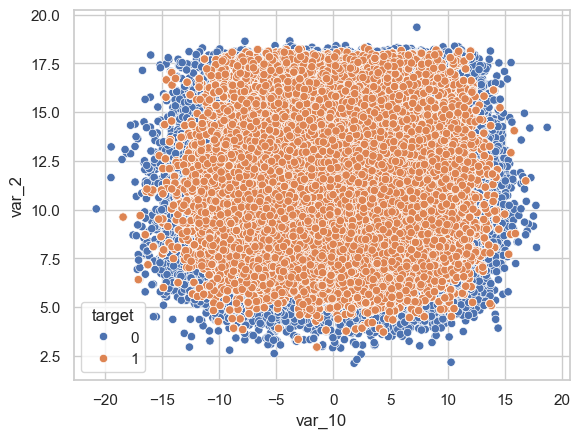

In [31]:
sns.scatterplot(x=X_over['var_10'], y=X_over['var_2'], hue=y_over)
plt.show()

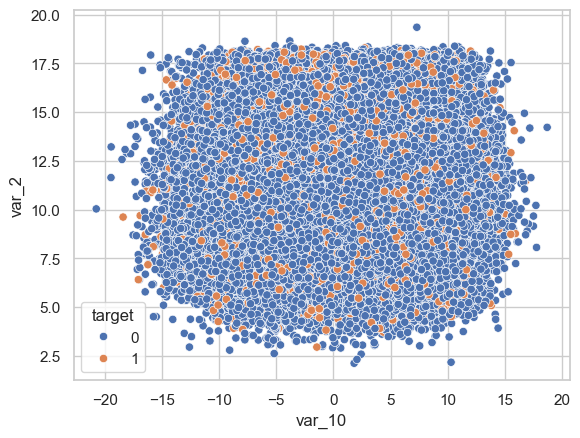

In [33]:
sns.scatterplot(data=data, x='var_10', y='var_2', hue='target')
plt.show()

### Outlier model = X2,Y2 (train_df)
### Sampling model= X_over, y_over  (train_df2)

## Algorithms to be used 

### Logistic regression
### K nearest neighbours 
### Naive Bayes
### Random Forest

# Logistic Regression For XT2,YT2

In [34]:
X2 = train_df.iloc[:,2:]
Y2 = train_df.iloc[:,1]
Y2

0         0
2         0
3         0
4         0
5         0
         ..
199993    0
199994    0
199995    0
199997    0
199999    0
Name: target, Length: 175073, dtype: int64

In [35]:
from sklearn.model_selection import train_test_split
XT2,Xt2,YT2,Yt2 = train_test_split(X2,Y2,test_size = 0.2,random_state = 42)

In [36]:
import statsmodels.api as sm

In [37]:
logreg = sm.Logit(YT2,XT2).fit()

Optimization terminated successfully.
         Current function value: 0.227420
         Iterations 8


In [38]:
logreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:               140058
Model:                          Logit   Df Residuals:                   139858
Method:                           MLE   Df Model:                          199
Date:                Sat, 19 Apr 2025   Pseudo R-squ.:                  0.2893
Time:                        21:07:56   Log-Likelihood:                -31852.
converged:                       True   LL-Null:                       -44819.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
var_0          0.0547      0.003     16.135      0.000       0.048       0.061
var_1          0.0394      0.003     15.311      0.000       0.034       0.044
var_2          0.0675      0.004     17.329      0.000       0.060       0.075
var_3          0.0173      0.005      3.380      0.001       0.007       0.027
var_4          0.0215      0.006      3.345      0.001       0.009       0.034
var_5          0.0144      0.001     10.823      0.000       0.012       0.017
var_6          0.2717      0.012     22.745      0.000       0.248       0.295
var_7         -0.0004      0.003     -0.118      0.906      -0.006       0.006
var_8          0.0184      0.003      5.863      0.000       0.012       0.025
var_9         -0.1190      0.008    -14.183      0.000      -0.136      -0.103
var_10        -0.0015      0.002     -0.769      0.442      -0.005       0.002
var_11         0.0135      0.002      7.690      0.000       0.010       0.017
var_12        -1.1289      0.054    -20.922      0.000      -1.235      -1.023
var_13        -0.0376      0.002    -16.823      0.000      -0.042      -0.033
var_14        -0.0047      0.005     -1.019      0.308      -0.014       0.004
var_15         0.1131      0.025      4.459      0.000       0.063       0.163
var_16         0.0112      0.004      2.734      0.006       0.003       0.019
var_17      6.355e-05      0.002      0.041      0.968      -0.003       0.003
var_18         0.0170      0.001     12.896      0.000       0.014       0.020
var_19         0.0046      0.001      3.493      0.000       0.002       0.007
var_20        -0.0112      0.002     -6.300      0.000      -0.015      -0.008
var_21        -0.0239      0.001    -18.745      0.000      -0.026      -0.021
var_22         0.0705      0.004     19.354      0.000       0.063       0.078
var_23        -0.1813      0.020     -9.112      0.000      -0.220      -0.142
var_24         0.0271      0.003      9.830      0.000       0.022       0.033
var_25         0.1421      0.037      3.881      0.000       0.070       0.214
var_26         0.0336      0.002     19.331      0.000       0.030       0.037
var_27        -0.0023      0.007     -0.340      0.734      -0.016       0.011
var_28        -0.1142      0.013     -8.526      0.000      -0.141      -0.088
var_29         0.0061      0.004      1.527      0.127      -0.002       0.014
var_30        -0.0004      0.001     -0.308      0.758      -0.003       0.002
var_31        -0.0425      0.005     -8.637      0.000      -0.052      -0.033
var_32         0.0377      0.004      9.356      0.000       0.030       0.046
var_33        -0.0351      0.002    -14.421      0.000      -0.040      -0.030
var_34        -0.3398      0.019    -17.636      0.000      -0.378      -0.302
var_35         0.0224      0.002     11.067      0.000       0.018       0.026
var_36        -0.0436      0.003    -13.025      0.000      -0.050      -0.037
var_37         0.0105      0.005      2.260      0.024       0.001       0.020
va

In [39]:
#predicting
logreg_predict = logreg.predict(Xt2)

In [40]:
y_predict = logreg_predict.round()

In [41]:
from sklearn.metrics import confusion_matrix

In [42]:
confusion_matrix(Yt2,y_predict)

array([[31185,   411],
       [ 2544,   875]], dtype=int64)

In [43]:
from sklearn.metrics import roc_auc_score,auc

In [44]:
print("AUC SCORE IS :",roc_auc_score(Yt2,y_predict))

AUC SCORE IS : 0.6214574043733845


In [45]:
from sklearn.metrics import classification_report,roc_curve

In [46]:
a = classification_report(Yt2,y_predict)

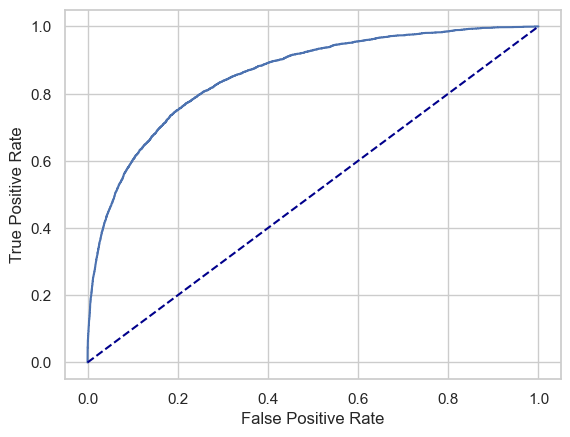

In [47]:
fpr, tpr, _ = roc_curve(Yt2, logreg_predict)

#create ROC curve
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Using LR SKLEARN for sampling model

In [48]:
from sklearn.linear_model import LogisticRegression


In [49]:
from sklearn.model_selection import train_test_split
XT_samp,Xt_samp,YT_samp,Yt_samp = train_test_split(X_over,y_over,test_size = 0.2,random_state=42)


In [50]:
logModel=LogisticRegression(C=0.0001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=20000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
logModel.fit(XT_samp , YT_samp)

LogisticRegression(C=0.0001, max_iter=20000, random_state=42)

In [51]:
lr_score=logModel.score(Xt_samp,Yt_samp)
print('Accuracy of the logistic regression model :',lr_score)


Accuracy of the logistic regression model : 0.7732799710954544


In [52]:
from sklearn.model_selection import cross_val_score,cross_val_predict
#Cross validation prediction
cv_pred=cross_val_predict(logModel,Xt_samp,Yt_samp,cv=5)
#Cross validation score
cv_score=cross_val_score(logModel,Xt_samp,Yt_samp,cv=5)
print('cross_val_score :',np.average(cv_score))

cross_val_score : 0.7638582542769173


In [53]:
#Confusion matrix
cm=confusion_matrix(Yt_samp,cv_pred)
cm

array([[27679,  8368],
       [ 8625, 27289]], dtype=int64)

In [54]:
scores=classification_report(Yt_samp,cv_pred)
print(scores)

              precision    recall  f1-score   support

           0       0.76      0.77      0.77     36047
           1       0.77      0.76      0.76     35914

    accuracy                           0.76     71961
   macro avg       0.76      0.76      0.76     71961
weighted avg       0.76      0.76      0.76     71961



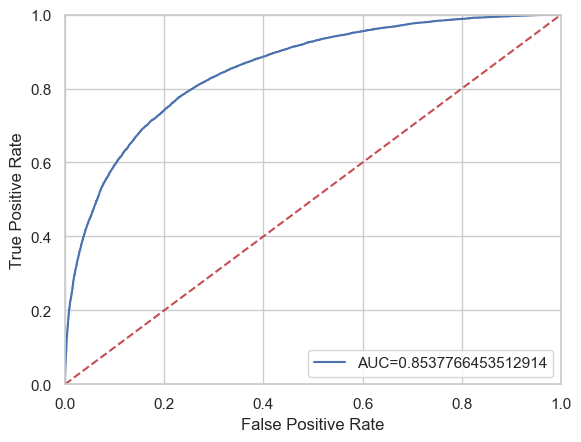

In [55]:
y_pred_proba = logModel.predict_proba(Xt_samp)[::,1]
fpr, tpr, _ = roc_curve(Yt_samp,  y_pred_proba)
auc = roc_auc_score(Yt_samp, y_pred_proba)


#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')

plt.xlabel('False Positive Rate')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.legend(loc=4)
plt.show()

# Random Forest for outlier model

In [56]:
X2 = train_df.iloc[:,2:]
Y2 = train_df.iloc[:,1]


In [57]:
from sklearn.model_selection import train_test_split
XT2_rf,Xt2_rf,YT2_rf,Yt2_rf = train_test_split(X2,Y2,test_size = 0.2,random_state = 42)

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
RF_model = RandomForestClassifier(class_weight='balanced',
                                 criterion='gini',
                                 max_depth=55,
                                 max_features='log2',
                                 min_samples_leaf=0.005,
                                 min_samples_split=0.005,
                                 n_estimators=190).fit(XT2_rf,YT2_rf)

In [60]:
RF_pred = RF_model.predict(Xt2_rf)

In [61]:
from sklearn.metrics  import confusion_matrix

In [62]:
confusion_matrix(Yt2_rf,RF_pred)

array([[24667,  6929],
       [  905,  2514]], dtype=int64)

In [63]:
from sklearn.metrics  import classification_report
cr=classification_report(Yt2_rf,RF_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.96      0.78      0.86     31596
           1       0.27      0.74      0.39      3419

    accuracy                           0.78     35015
   macro avg       0.62      0.76      0.63     35015
weighted avg       0.90      0.78      0.82     35015



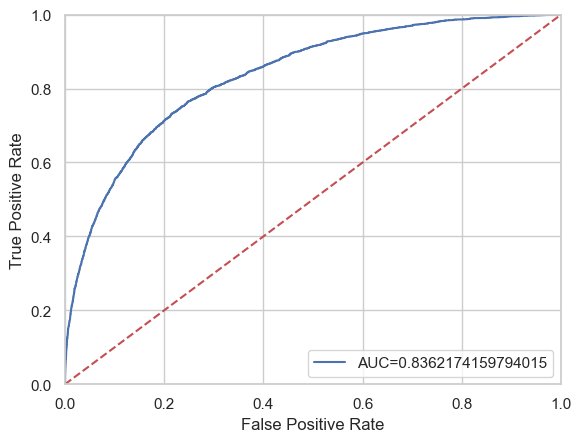

In [64]:
from sklearn.metrics import roc_curve,roc_auc_score
y_pred_proba_RF = RF_model.predict_proba(Xt2_rf)[::,1]
fpr, tpr, _ = roc_curve(Yt2_rf,  y_pred_proba_RF)
auc = roc_auc_score(Yt2_rf, y_pred_proba_RF)


#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')

plt.xlabel('False Positive Rate')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.legend(loc=4)
plt.show()

# RF FOR SAMPLING MODEL

In [65]:
XT_samp_rf,Xt_samp_rf,YT_samp_rf,Yt_samp_rf = train_test_split(X_over,y_over,test_size = 0.2,random_state=42)


In [66]:
RF_model_samp = RandomForestClassifier(class_weight='balanced',
                                 criterion='gini',
                                 max_depth=55,
                                 max_features='log2',
                                 min_samples_leaf=0.005,
                                 min_samples_split=0.005,
                                 n_estimators=190).fit(XT_samp_rf,YT_samp_rf)

In [67]:
RF_pred_samp = RF_model_samp.predict(Xt_samp_rf)

In [68]:
confusion_matrix(Yt_samp_rf,RF_pred_samp)

array([[26896,  9151],
       [ 6716, 29198]], dtype=int64)

In [69]:
from sklearn.metrics  import classification_report
cr=classification_report(Yt_samp_rf,RF_pred_samp)
print(cr)

              precision    recall  f1-score   support

           0       0.80      0.75      0.77     36047
           1       0.76      0.81      0.79     35914

    accuracy                           0.78     71961
   macro avg       0.78      0.78      0.78     71961
weighted avg       0.78      0.78      0.78     71961



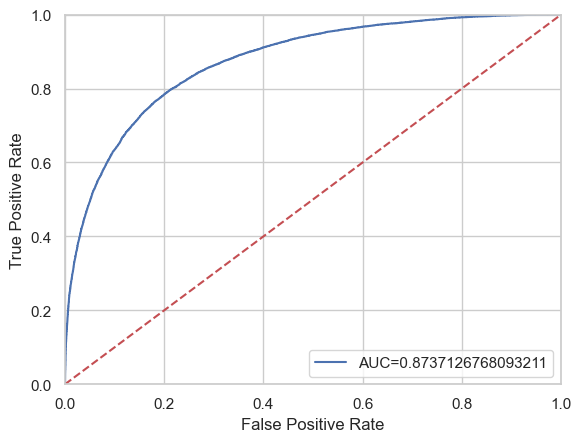

In [70]:
from sklearn.metrics import roc_curve,roc_auc_score
y_pred_proba_RF_samp = RF_model.predict_proba(Xt_samp_rf)[::,1]
fpr, tpr, _ = roc_curve(Yt_samp_rf,  y_pred_proba_RF_samp)
auc = roc_auc_score(Yt_samp_rf, y_pred_proba_RF_samp)


#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')

plt.xlabel('False Positive Rate')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.legend(loc=4)
plt.show()

# KNN

In [71]:
from sklearn.model_selection import train_test_split
X_train_samp_knn, X_test_samp_knn, y_train_samp_knn, y_test_samp_knn = train_test_split(X_over, y_over, test_size=0.20, random_state=42)

In [72]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

In [73]:
X_train1_samp_knn = std_scaler.fit_transform(X_train_samp_knn)
X_test1_samp_knn =std_scaler.transform(X_test_samp_knn)

In [74]:

from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X_train1_samp_knn,y_train_samp_knn)

y_predict= model.predict(X_test1_samp_knn)

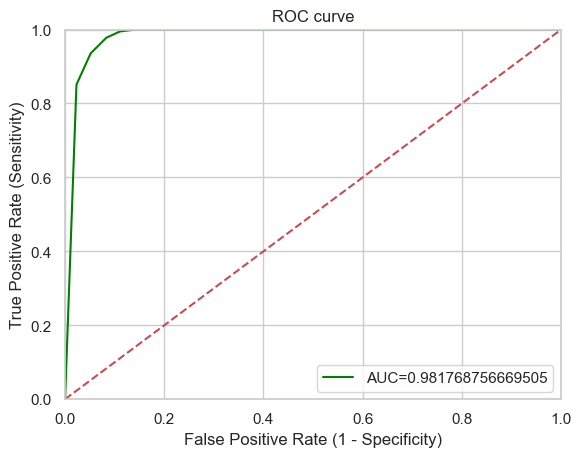

In [75]:
from sklearn.metrics import accuracy_score, recall_score, precision_score
y_proba = model.predict_proba(X_test1_samp_knn)[:,1]


from sklearn.metrics import roc_curve,roc_auc_score,auc
%matplotlib inline
#y_predict = model.predict_proba(X_test1_samp_knn)[:,1]
fpr, tpr, thresholds = roc_curve(y_test_samp_knn,y_proba)
auc=roc_auc_score(y_test_samp_knn,y_proba)
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.plot(fpr, tpr,color='green',label="AUC="+str(auc))
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.legend(loc=4)
plt.show()

In [76]:
accuracy_score(y_test_samp_knn,y_predict)


0.9473186865107489

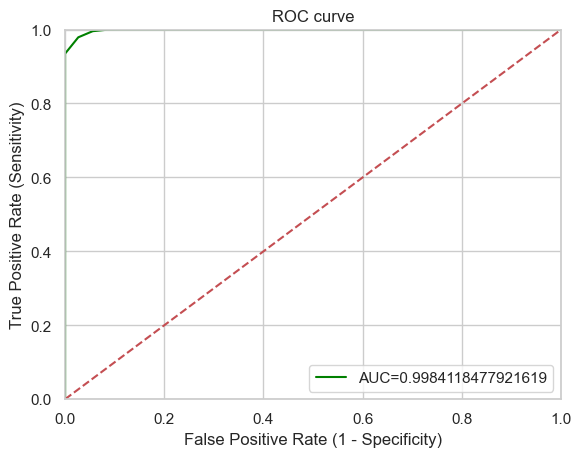

In [77]:
from sklearn.metrics import accuracy_score, recall_score, precision_score
y_proba_train = model.predict_proba(X_train1_samp_knn)[:,1]


from sklearn.metrics import roc_curve,roc_auc_score,auc
%matplotlib inline
#y_predict = model.predict_proba(X_test1_samp_knn)[:,1]
fpr, tpr, thresholds = roc_curve(y_train_samp_knn,y_proba_train)
auc=roc_auc_score(y_train_samp_knn,y_proba_train)
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.plot(fpr, tpr,color='green',label="AUC="+str(auc))
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.legend(loc=4)
plt.show()

In [78]:
pd.crosstab(y_test_samp_knn,y_predict)



col_0,0,1
target,,
0,33045,3002
1,789,35125


# Naive Bayes

In [79]:
from sklearn.naive_bayes import GaussianNB

In [80]:
NB_model = GaussianNB().fit(XT_samp,YT_samp)

In [81]:
NB_pred = NB_model.predict(Xt_samp)

In [82]:
pd.crosstab(Yt_samp,NB_pred)

col_0,0,1
target,,
0,29251,6796
1,6940,28974


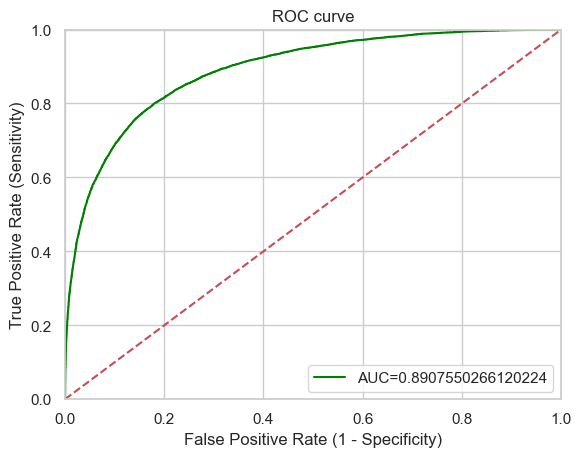

In [83]:
y_proba_NB = NB_model.predict_proba(Xt_samp)[:,1]
fpr, tpr, thresholds = roc_curve(Yt_samp,y_proba_NB)
auc=roc_auc_score(Yt_samp,y_proba_NB)
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.plot(fpr, tpr,color='green',label="AUC="+str(auc))
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.legend(loc=4)
plt.show()

# For outlier model

In [84]:
xT,xt,yT,yt = train_test_split(x2,y2,test_size = 0.2,random_state=42)


In [85]:
NB_model2 = GaussianNB().fit(xT,yT)

In [86]:
NB_pred2 = NB_model.predict(xt)

In [87]:
NB_pred2.shape

(35015,)

In [88]:
pd.crosstab(yt,NB_pred2)

col_0,0,1
target,,
0,26009,5587
1,718,2701


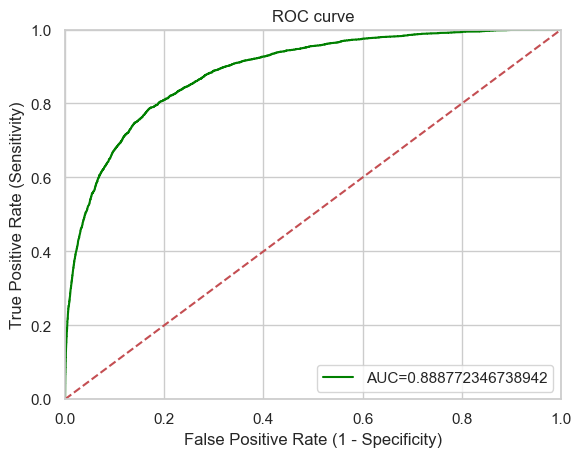

In [89]:
y_proba_NB2 = NB_model.predict_proba(xt)[:,1]
fpr, tpr, thresholds = roc_curve(yt,y_proba_NB2)
auc=roc_auc_score(yt,y_proba_NB2)
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.plot(fpr, tpr,color='green',label="AUC="+str(auc))
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.legend(loc=4)
plt.show()

# Model Comparison Report

#### a)Algorithm on outlier models and their Score.
* __Logistic Regression     : 0.62__
* __Random Forest           : 0.83__
* __Naive Bayes             : 0.88__
* __KNN                     : 0.98__


#### b)Algorithm on Sampled model and their score.
* __Logistic Regression : 0.85__
* __Random Forest : 0.87__
* __Naive Bayes : 0.89__
* __KNN : 0.99__

* #### KNN is giving a good result for sampled model.

# Compared models to identify the best-performing approach.


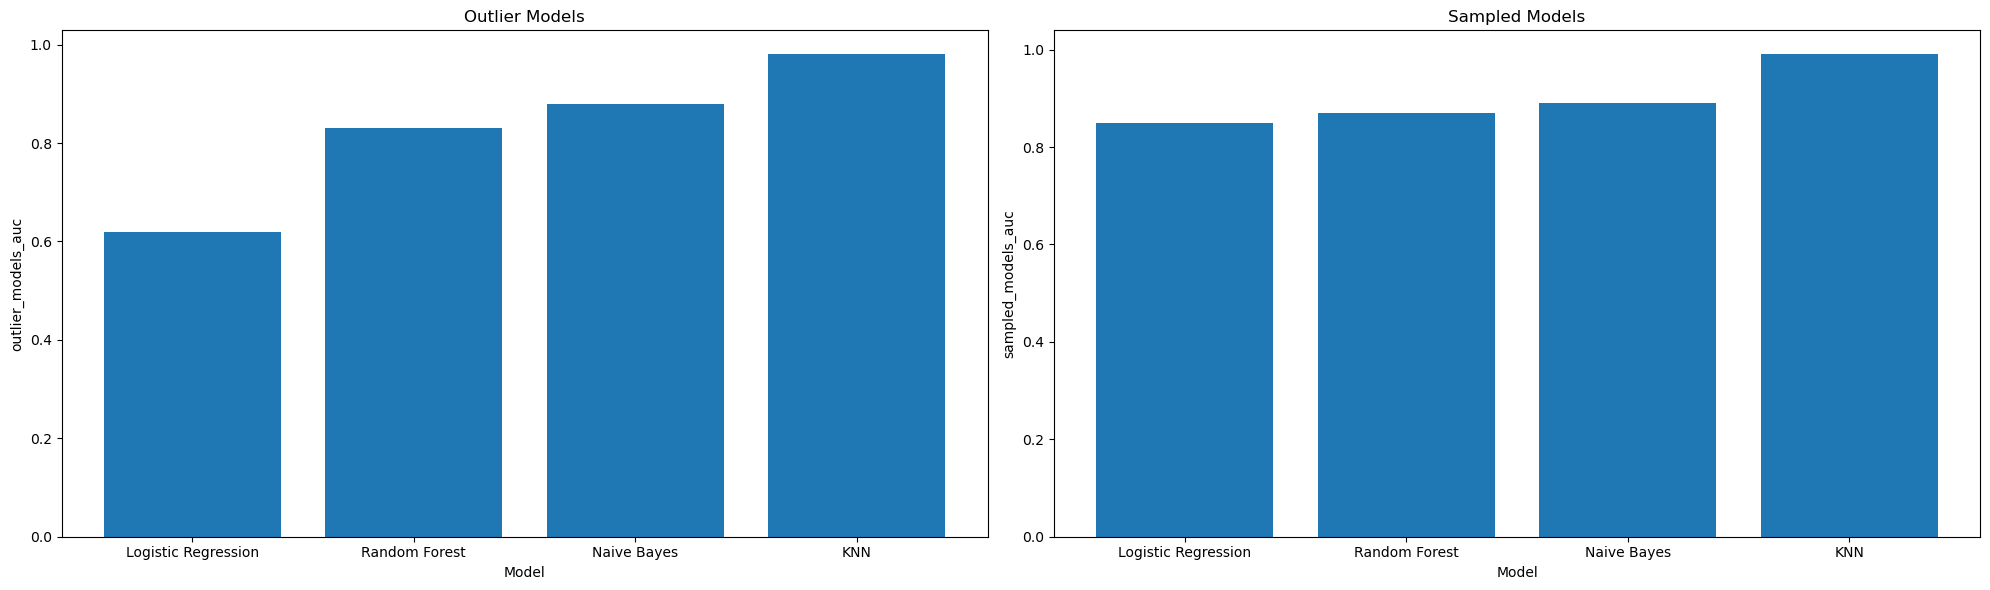

In [7]:
model_names = ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'KNN']
outlier_models_auc = [0.62, 0.83, 0.88, 0.98]
sampled_models_auc = [0.85, 0.87, 0.89, 0.99]

# Create a figure and axis object
fig, ax = plt.subplots(1, 2, figsize=(20, 6))
ax[0].bar(model_names, outlier_models)
ax[0].set_title('Outlier Models')
ax[0].set_xlabel('Model')
ax[0].set_ylabel('outlier_models_auc')
ax[1].bar(model_names, sampled_models)
ax[1].set_title('Sampled Models')
ax[1].set_xlabel('Model')
ax[1].set_ylabel('sampled_models_auc')
fig.tight_layout()
# Display the plot
plt.show()



# Report on challenges Faced

__1.Class Imbalance:__

* The dataset was highly imbalanced, which can lead to biased models. To address this, RandomOverSampler was used to oversample the minority class.

__2.Outliers:__

* Outliers were present in almost all variables, which can affect model performance. To handle this, the Interquartile Range (IQR) method was used to remove outliers from the dataset.

__3.Data Preprocessing:__
* The dataset required careful preprocessing, including handling missing values, removing outliers, and oversampling the minority class.